In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing
from IPython.display import Image 
import pydotplus
%pylab inline
fileURL ='car.data.txt'
data = pd.read_csv(fileURL, names=['buying','maint','doors','persons','lug_boot','safety','acceptability'], header=None, delimiter=",")

Populating the interactive namespace from numpy and matplotlib


/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
data.describe()

buying  maint  doors persons lug_boot safety acceptability
count    1728   1728   1728    1728     1728   1728          1728
unique      4      4      4       3        3      3             4
top     vhigh  vhigh  5more    more      big    low         unacc
freq      432    432    432     576      576    576          1210

In [56]:
lex = preprocessing.LabelEncoder()
w = data.ix[:,0:6].as_matrix()
nw = lex.fit_transform(w[0])
for i in w[1:]:
    nw = np.vstack([nw, lex.fit_transform(i)])
transformed_data = pd.DataFrame(nw, columns=data.columns[0:6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d331ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1264d12e8>]], dtype=object)

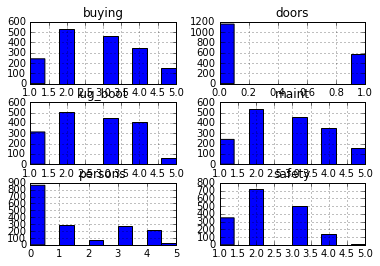

In [57]:
transformed_data.hist()

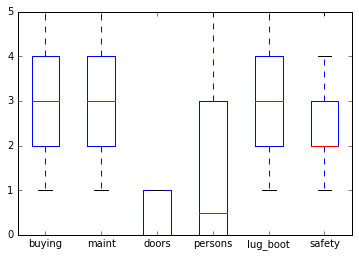

In [58]:
transformed_data.plot(kind='box')

In [59]:
features = transformed_data.columns
print("* features:", features, sep="\n")

* features:
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [60]:
ley = preprocessing.LabelEncoder()
Y = data['acceptability'].as_matrix()
Y = ley.fit_transform(Y)
X = transformed_data[features]
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

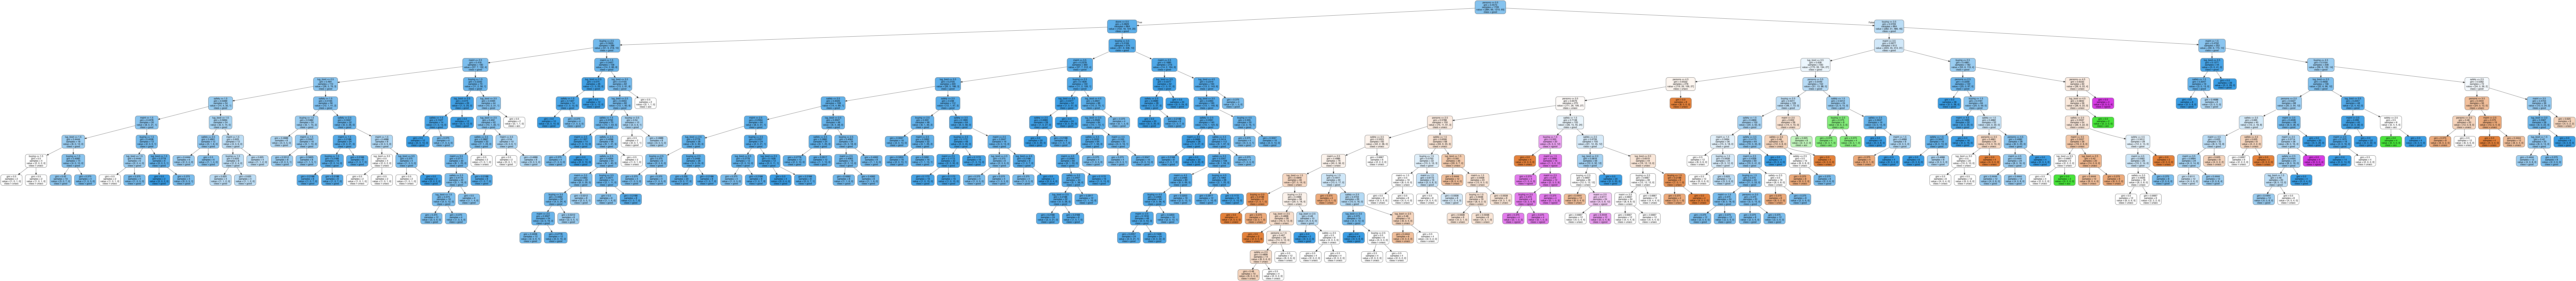

In [61]:
with open("tree_image.dot", 'w') as f:
    f = tree.export_graphviz(clf, feature_names=features, 
                            class_names=['unacc', 'acc', 'good', 'vgood'], 
                            filled=True, 
                            rounded=True,
                            out_file=f)
graph = pydotplus.graph_from_dot_data(open('tree_image.dot').read()) 

Image(graph.create_png())

In [62]:
newPiece = ["vhigh","meg","5more","2","big","high"]
newX = lex.fit_transform(newPiece)
print(features)
print(newX)
print(clf.predict(newX))
print(ley.inverse_transform(clf.predict(newX)))

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[5 4 1 0 2 3]
[2]
['unacc']


/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [63]:
clf = tree.DecisionTreeClassifier(max_features=4,min_samples_split=100, random_state=99)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

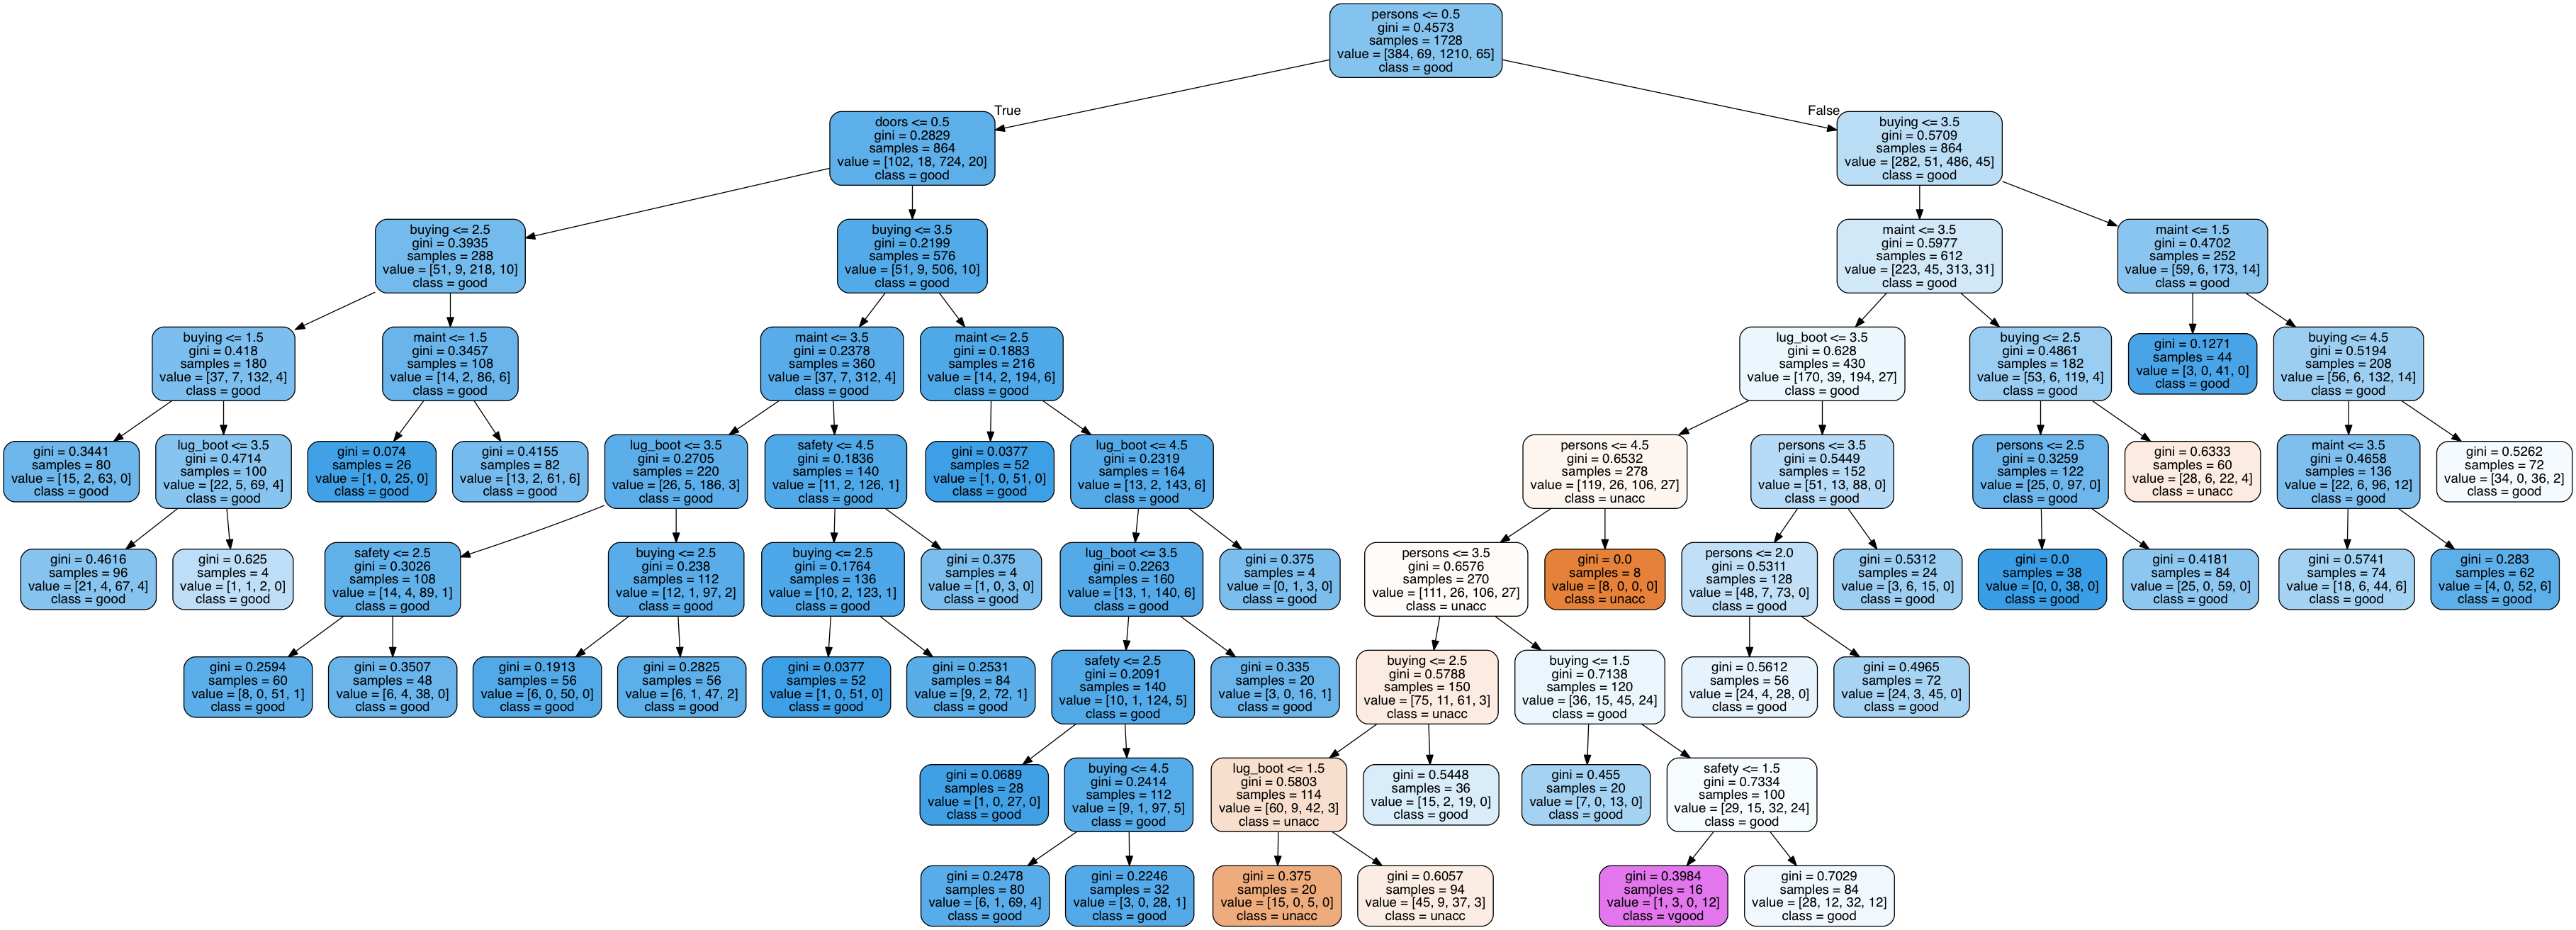

In [64]:
with open("tree_image.dot", 'w') as f:
    f = tree.export_graphviz(clf, feature_names=features, 
                            class_names=['unacc', 'acc', 'good', 'vgood'], 
                            filled=True, 
                            rounded=True,
                            out_file=f)
graph = pydotplus.graph_from_dot_data(open('tree_image.dot').read()) 

Image(graph.create_png())

In [65]:
newPiece = ["vhigh","meg","5more","2","big","high"]
newX = lex.fit_transform(newPiece)
print(features)
print(newX)
print(clf.predict(newX))
print(ley.inverse_transform(clf.predict(newX)))

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[5 4 1 0 2 3]
[2]
['unacc']


/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
